In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
df = pd.read_csv('/content/578080_PUBG.csv')
df

,Time,Sum of Playercount
0,12/14/2017,359489560
1,12/15/2017,411024096
2,12/16/2017,443528112
3,12/17/2017,417915489
4,12/18/2017,354798238
...,...,...
968,8/8/2020,62712578
969,8/9/2020,63468860
970,8/10/2020,55025198
971,8/11/2020,54134381


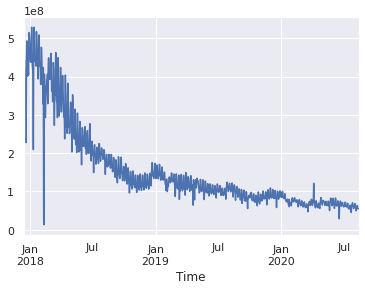

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('578080_PUBG.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

In [ ]:
## Cleaning up the data
df.columns=["Day","Sum_Player"]
df.head()

,Day,Sum_Player
0,12/14/2017,359489560
1,12/15/2017,411024096
2,12/16/2017,443528112
3,12/17/2017,417915489
4,12/18/2017,354798238


In [ ]:
# Convert Month into Datetime
df['Day']=pd.to_datetime(df['Day'])

In [ ]:
df.set_index('Day',inplace=True)

In [ ]:
#train = df.iloc[:77]
#test = df.iloc[77:]

In [ ]:
#train = train. drop(labels='Time', axis=1)
#test = test. drop(labels='Time', axis=1)

In [ ]:
import math

dataset = df.Sum_Player.values

training_data_len = math.ceil( len(dataset) * 0.8)
training_data_len

779

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit_transform(df)
scaled_data = scaler.transform(df)

In [ ]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(14, len(train_data)): #10
    x_train.append(train_data[i-14:i, 0]) #10
    y_train.append(train_data[i, 0])
    if i<= 15: #11
        print(x_train)
        print(y_train)
        print()


x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.67173018, 0.77161685, 0.83461767, 0.78497407, 0.66263724,
       0.67379249, 0.69140805, 0.41616591, 0.85036035, 0.93048915,
       0.83376985, 0.75185834, 0.77854453, 0.79747915])]
[0.7571566793375055]

[array([0.67173018, 0.77161685, 0.83461767, 0.78497407, 0.66263724,
       0.67379249, 0.69140805, 0.41616591, 0.85036035, 0.93048915,
       0.83376985, 0.75185834, 0.77854453, 0.79747915]), array([0.77161685, 0.83461767, 0.78497407, 0.66263724, 0.67379249,
       0.69140805, 0.41616591, 0.85036035, 0.93048915, 0.83376985,
       0.75185834, 0.77854453, 0.79747915, 0.75715668])]
[0.7571566793375055, 0.9243298616870665]



In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Sum of Playercount
Feature names seen at fit time, yet now missing:
- Sum_Player

  warnings.warn(message, FutureWarning)


In [ ]:
###

#**Adam Optimizer**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(189, return_sequences=False, input_shape= (x_train.shape[1], 1))) #input_shape= (x_train.shape[1], 1) , lstm 125
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mse', 'mae', 'mape'])

model_lstm.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
765/765 [==============================] - 10s 11ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0569 - mape: 859552.6250
Epoch 2/100
765/765 [==============================] - 8s 10ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0490 - mape: 728772.0000
Epoch 3/100
765/765 [==============================] - 8s 10ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0462 - mape: 809501.0000
Epoch 4/100
765/765 [==============================] - 8s 10ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0420 - mape: 694037.0000
Epoch 5/100
765/765 [==============================] - 8s 10ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0364 - mape: 664882.0625
Epoch 6/100
765/765 [==============================] - 8s 11ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0379 - mape: 412015.7812
Epoch 7/100
765/765 [==============================] - 8s 11ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0379 - mape: 351845.0312
Epoch 8/100
765/765 [==============================] - 8s 11ms/step - loss: 0.0041

In [ ]:
#Create the testing data set
test_data1 = scaled_data[training_data_len - 14: , :] #10
#Create the data sets x_test and y_test
x_test = []
y_test = df.values[779:, :] #779, kalo 772 = 7
for i in range(14, len(test_data1)): #10
  x_test.append(test_data1[i-14:i, 0]) #10

In [ ]:
#convert the data to numpy array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(194, 14, 1)

In [ ]:
# Get the models predicted price values
predictions = model_lstm.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
valid

,Sum_Player,Predictions
Day,,
2020-02-01,81727975,70555408.0
2020-02-02,83269557,79982544.0
2020-02-03,73556889,76536008.0
2020-02-04,76707054,72332992.0
2020-02-05,72741100,71226400.0
...,...,...
2020-08-08,62712578,65423276.0
2020-08-09,63468860,64477300.0
2020-08-10,55025198,59174376.0


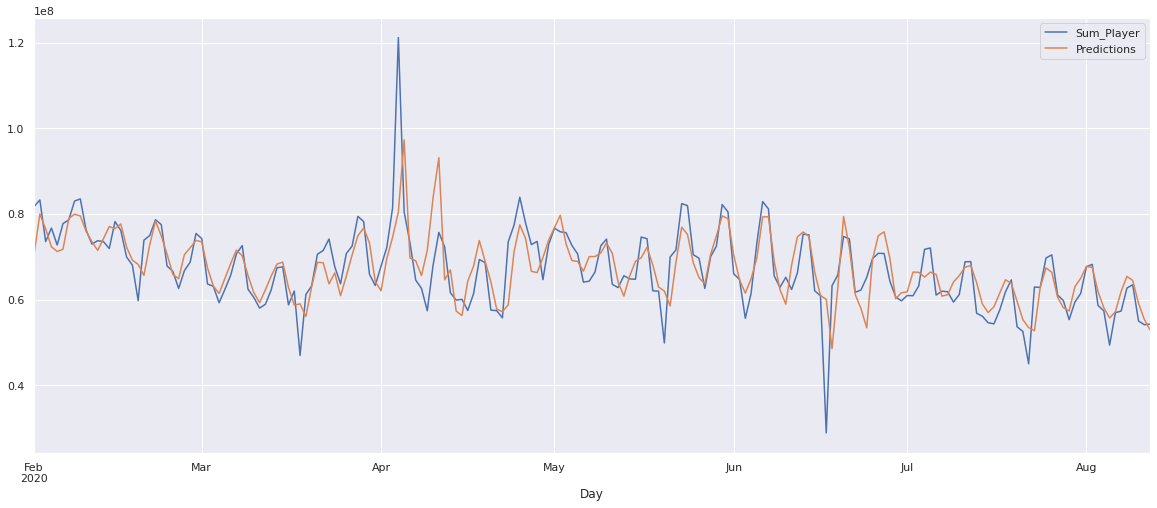

In [ ]:
valid.plot(figsize=(20,8))

In [ ]:
predictions = []
first_eval_batch = train_data[-14: ] #10
crntbatch = first_eval_batch.reshape((1, 14, 1)) #10
for i in range(35):
  crntpred = model_lstm.predict(crntbatch)[0]
  predictions.append(crntpred)
  crntbatch = np.append(crntbatch[: ,1:,:], [[crntpred]],axis=1)

In [ ]:
predictions

[array([0.11170429], dtype=float32),
 array([0.11806671], dtype=float32),
 array([0.11248584], dtype=float32),
 array([0.11300129], dtype=float32),
 array([0.10921541], dtype=float32),
 array([0.10814896], dtype=float32),
 array([0.11458105], dtype=float32),
 array([0.11055274], dtype=float32),
 array([0.11261305], dtype=float32),
 array([0.10970129], dtype=float32),
 array([0.10717554], dtype=float32),
 array([0.10704435], dtype=float32),
 array([0.10590072], dtype=float32),
 array([0.11037657], dtype=float32),
 array([0.10902949], dtype=float32),
 array([0.11000377], dtype=float32),
 array([0.10744616], dtype=float32),
 array([0.10566296], dtype=float32),
 array([0.10535561], dtype=float32),
 array([0.10547787], dtype=float32),
 array([0.10809128], dtype=float32),
 array([0.10795552], dtype=float32),
 array([0.10793476], dtype=float32),
 array([0.10598145], dtype=float32),
 array([0.10437578], dtype=float32),
 array([0.10422584], dtype=float32),
 array([0.1047291], dtype=float32),
 a

In [ ]:
true_predictions = scaler.inverse_transform(predictions)

In [ ]:
true_predictions

array([[70555368.99716306],
       [73837934.43246084],
       [70958594.65326923],
       [71224528.77346921],
       [69271280.29314983],
       [68721068.58737457],
       [72039575.22159505],
       [69961251.3690247 ],
       [71024226.74208272],
       [69521961.506684  ],
       [68218852.79708046],
       [68151168.02375096],
       [67561132.70077366],
       [69870356.65354598],
       [69175357.65380043],
       [69678019.34559989],
       [68358473.78395426],
       [67438463.65906018],
       [67279891.85820895],
       [67342971.54530215],
       [68691308.50587088],
       [68621263.52974582],
       [68610554.2056604 ],
       [67602786.05173904],
       [66774370.24640966],
       [66697014.02318824],
       [66956659.39457137],
       [67905253.34354985],
       [68010985.81601697],
       [67815757.8362431 ],
       [66982390.98661292],
       [66321957.04148907],
       [66287807.13654477],
       [66651616.63716931],
       [67364859.1588493 ]])

In [ ]:
prediction_LSTM = pd.DataFrame(true_predictions,
             columns=['LSTM Prediction Adam Optimizer'])

prediction_LSTM

,LSTM Prediction Adam Optimizer
0,7.055537e+07
1,7.383793e+07
2,7.095859e+07
3,7.122453e+07
4,6.927128e+07
5,6.872107e+07
6,7.203958e+07
7,6.996125e+07
8,7.102423e+07
9,6.952196e+07


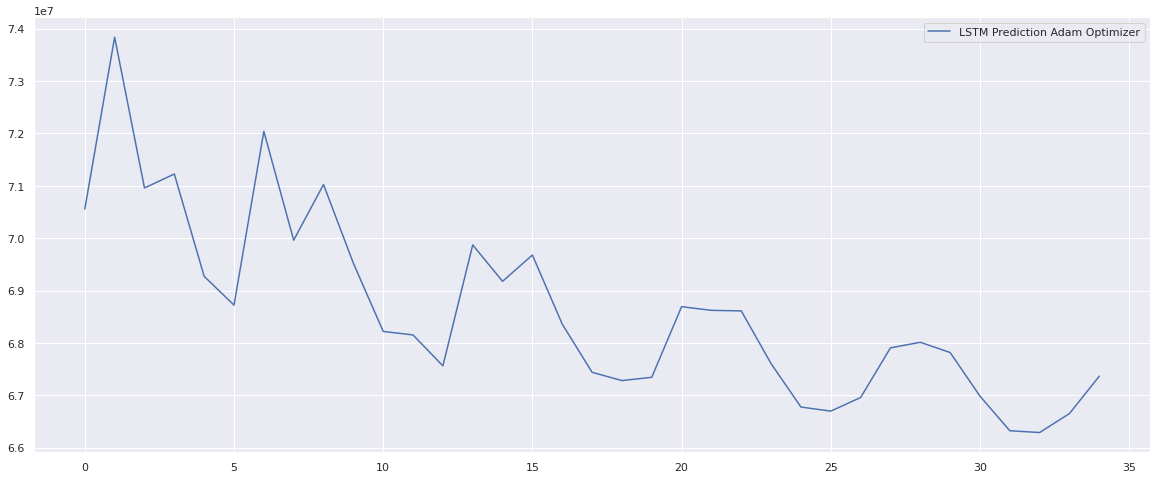

In [ ]:
prediction_LSTM.plot(figsize=(20,8))

In [ ]:
####

In [ ]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

#MAPE_test_Adam = mape(x_test, y_test)

#MAPE_All_Adam = mape(x_train, prediction_LSTM)
MAPE = mape(valid['Sum_Player'], valid['Predictions'])
MAPE

6.436296682044714

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(expected, predictions)
MSD = mean_squared_error(valid['Sum_Player'],valid['Predictions'])

NameError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error

#RMSE_test_Adam = mean_squared_error(x_test, y_test)
#RMSE_All_Adam = mean_squared_error(df, prediction_LSTM)

#**MAPE**

In [ ]:
#MAPE_test_Adam

In [ ]:
#MAPE_All_Adam

#**RMSE**

In [ ]:
#RMSE_test_Adam

In [ ]:
#RMSE_All_Adam